# <center>Projeto Final - Big Data Science - Semantix (Dez.2022)</center>
# <b>Análise da base de dados do ENEM 2021</b>
## <p style="color:blue">O modelo de ML prevê a nota final do aluno a partir de informações pessoais e das respostas ao questionário socio-econômico.</p> 
### Calcula uma estimativa de qual será a nota, antes do aluno fazer qualquer prova, somente pelas informações respondidas no processo de inscrição.    
###  

## Análise exploratória dos dados

In [1]:
# Importação das principais bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Fonte original do dataset: os dados aqui utilizados estão publicamente disponíveis em:
#    https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

# Arquivo original utilizado 'microdados_enem_2021/MICRODADOS_ENEM_2021.csv'
# O arquivo original tem 1.5GB e consiste de 3.389.832 registro com 76 colunas

dados_2021 = pd.read_csv('MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')

In [3]:
dados_2021.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,...,B,A,A,B,B,A,C,A,A,B
7,210054368957,2021,4,F,1,1,1,1,1,1,...,B,A,A,C,B,A,D,B,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,...,B,A,B,C,B,A,C,A,A,B


In [4]:
dados_2021.shape

(3389832, 76)

In [41]:
# Cria uma lista com os nomes de todas as colunas
# No arquivo 'Dicionário_Microdados_Enem_2021.ods' há a descrição de cada coluna, e os valores que podem assumir
todas_colunas = dados_2021.columns
todas_colunas

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [6]:
# Itera sobre cada coluna, analisando quantos dados ausentes ela apresenta e qual seu espectro de valores
for col in todas_colunas:
    print("Qde valores nulos: ",dados_2021[col].isna().sum())
    print("Valor    Ocorrências")
    print(dados_2021[col].value_counts())
    print("\n\n")

Qde valores nulos:  0
Valor    Ocorrências
210053865474    1
210053453252    1
210054355963    1
210053359060    1
210052502919    1
               ..
210052701228    1
210051762464    1
210053794773    1
210052681070    1
210052410399    1
Name: NU_INSCRICAO, Length: 3389832, dtype: int64



Qde valores nulos:  0
Valor    Ocorrências
2021    3389832
Name: NU_ANO, dtype: int64



Qde valores nulos:  0
Valor    Ocorrências
3     699365
2     620784
4     394689
1     274318
5     250690
11    227574
6     177086
7     132052
12    130746
8     100580
13     93073
9      85742
10     71199
14     58754
15     35808
16     20564
17     10804
18      4102
19      1342
20       560
Name: TP_FAIXA_ETARIA, dtype: int64



Qde valores nulos:  0
Valor    Ocorrências
F    2090526
M    1299306
Name: TP_SEXO, dtype: int64



Qde valores nulos:  0
Valor    Ocorrências
1    2995915
2     196285
0     139630
3      54141
4       3861
Name: TP_ESTADO_CIVIL, dtype: int64



Qde valores nulos:  0
Valor 

427.8    1001
442.7     999
491.4     989
428.5     985
419.3     984
         ... 
918.9       1
914.9       1
911.3       1
323.0       1
310.5       1
Name: NU_NOTA_MT, Length: 6149, dtype: int64



Qde valores nulos:  1143988
Valor    Ocorrências
.............................................    393
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC    149
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD    132
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA    104
BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB     91
                                                ... 
CBBCACDBDEBDBEDEACBDDCCADCEDACCDCEDDADBCDEDEB      1
CBECBABADDBCECAAAEDBCDACCDDDECDEBDABECBBBEECA      1
ABCECCDDDBCBAADCACDEABAEBDEACCCEECCEBACBEAEAE      1
EDBDCBBEADCDADCCEDAABACCDECDECCCDBEDCDDBBAACA      1
BDDCACBDEEACEBCDADBDABECCBABEAEBDCDCDBBCDBAAD      1
Name: TX_RESPOSTAS_CN, Length: 2244621, dtype: int64



Qde valores nulos:  1011453
Valor    Ocorrências
.............................................    4632
AAAAAAA

B    1407976
D     825541
A     501016
F     271019
C     212966
E     171312
Name: Q004, dtype: int64



Qde valores nulos:  2
Valor    Ocorrências
4.0     1128097
3.0      916285
5.0      506748
2.0      457681
6.0      170463
1.0      103508
7.0       60949
8.0       25644
9.0        9653
10.0       5834
11.0       2034
12.0       1308
13.0        554
14.0        313
15.0        258
20.0        253
16.0        107
17.0         54
18.0         48
19.0         39
Name: Q005, dtype: int64



Qde valores nulos:  2
Valor    Ocorrências
B    932838
C    575943
D    432478
F    233353
E    209943
A    202114
G    195709
H    151384
I     93898
J     57492
M     57363
Q     48686
K     45090
L     39388
O     39169
P     39117
N     35865
Name: Q006, dtype: int64



Qde valores nulos:  2
Valor    Ocorrências
A    3106217
B     151371
D      96180
C      36062
Name: Q007, dtype: int64



Qde valores nulos:  2
Valor    Ocorrências
B    2213952
C     788165
D     235999
E     129049
A      226

In [42]:
# Cria uma tabela de correlação entre cada par de colunas
dados_2021.corr()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,1.000000,NaN,-0.005605,-0.000075,-0.002712,0.001426,0.003560,-0.004616,0.003129,0.000973,...,0.001646,-0.003328,0.000091,0.001239,0.001563,0.000650,0.000890,0.000650,0.001104,0.000525
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_FAIXA_ETARIA,-0.005605,NaN,1.000000,0.313685,0.104158,-0.015088,-0.618575,0.792607,-0.400859,0.064482,...,-0.087409,0.188443,0.024405,-0.094506,-0.104822,-0.093644,-0.116223,-0.137536,-0.126709,-0.172105
TP_ESTADO_CIVIL,-0.000075,NaN,0.313685,1.000000,0.037875,-0.004112,-0.132982,0.264585,-0.103896,0.005767,...,-0.036921,0.060301,0.011288,-0.036332,-0.040969,-0.041492,-0.045755,-0.053071,-0.050200,-0.058243
TP_COR_RACA,-0.002712,NaN,0.104158,0.037875,1.000000,0.028606,-0.085915,0.054681,-0.060121,0.015557,...,-0.204871,0.160490,0.034995,-0.139852,-0.107026,-0.116966,-0.117697,-0.121788,-0.135087,0.070579
TP_NACIONALIDADE,0.001426,NaN,-0.015088,-0.004112,0.028606,1.000000,0.012333,-0.021480,0.004725,0.006046,...,-0.027126,0.014166,0.005818,-0.022020,-0.019443,-0.021672,-0.020032,-0.022091,-0.023733,0.013163
TP_ST_CONCLUSAO,0.003560,NaN,-0.618575,-0.132982,-0.085915,0.012333,1.000000,-0.510057,0.362940,NaN,...,-0.012725,-0.134726,0.032763,-0.023926,-0.037039,-0.046319,-0.035226,-0.021456,-0.035873,0.096784
TP_ANO_CONCLUIU,-0.004616,NaN,0.792607,0.264585,0.054681,-0.021480,-0.510057,1.000000,-0.402619,NaN,...,0.000725,0.117147,-0.015679,0.003214,-0.031735,-0.009876,-0.033581,-0.060450,-0.034777,-0.166449
TP_ESCOLA,0.003129,NaN,-0.400859,-0.103896,-0.060121,0.004725,0.362940,-0.402619,1.000000,-0.026439,...,0.052856,-0.081183,0.000550,0.029868,0.042571,0.033946,0.046551,0.053695,0.048354,0.075452
TP_ENSINO,0.000973,NaN,0.064482,0.005767,0.015557,0.006046,NaN,NaN,-0.026439,1.000000,...,-0.029662,0.014365,0.010534,-0.029596,-0.024960,-0.028195,-0.029068,-0.029595,-0.031686,0.002029


## Considerações após a análise exploratória:

- Observa-se que há colunas que assumem rótulos numéricos e alfanuméricos, conforme legenda disponível no arquivo 'Dicionário_Microdados_Enem_2021.ods'.  
  
  
- Algumas colunas apresentam alta proporção de valores ausentes ou com o valor "0 - Não informado" e portanto não contribuem para a análise dos dados.
  
  
- A coluna 'NU_INSCRICAO' é o identificador do candidato, e 'NU_ANO' é comum para todos os registros, podendo ambas serem desconsideradas nas análises.  
  
  
- As demais colunas do bloco *DADOS DO PARTICIPANTE* são importantes para análises, mas 'TP_ANO_CONCLUIU' e 'TP_ESCOLA' apresentam respectivamente 52% e 66% de valores "não informado", tendo que ser desconsideradas nas análises.  
  
  
- Em 'TP_NACIONALIDADE', 98% dos candidatos se declararam nascidos no Brasil, por isso a variável possivelmente não trará contribuição relevante à análise. Idem para 'TP_ENSINO', em que massivamente os candidados cursaram o ensino regular, ou não respoderam à questão.  


- O conjunto *DADOS DA ESCOLA* tem dados majoritariamente ausentes, e informações muito específicas (município do aluno) que podem não contribuir para uma análise mais ampla dos dados.  
  
  
- No conjunto *DADOS DO LOCAL DE APLICAÇÃO DA PROVA*, os dados estão presentes (não necessariamente o candidato fez a prova na cidade onde mora ou estuda), mas as informações também são muito específicas, à exceção do Estado, para o qual pode ser utilizado a sigla da UF.  
  
  
- No conjunto *DADOS DA PROVA OBJETIVA*, há a informação de se o aluno compareceu à todas as provas, e também a nota final que este obteve em cada prova. Estas são informações de suma importância para a análise.  
  
- Em *DADOS DA REDAÇÃO*, a única informação a ser considerada é também a nota final obtida, os demais dados são específicos demais para um análise mais ampla.  
  
- Os *DADOS DO QUESTIONÁRIO SOCIOECONÔMICO* trazem informações pessoais respondidas pela quase totalidade dos alunos, sendo portanto informações valiosas a serem consideradas.
  
  
  
  
  
## Prosposta: 
### <p style="color:red">Considerando as informações disponíveis (quais dados e a qualidade deles), e o objetivo final da prova (a avaliação dos candidatos através de uma nota), e que praticamente todos os candidatos responderam a um questionário socioeconômico com informações de natureza bastante pessoal, uma proposta interessante seria tentar estimar a nota final (média das provas individuais) a partir das informações pessoais dos candidatos.  
### Enquanto as informações gerais possibilitam traçar um panorama do candidato (idade, sexo, se concluiu ou não o Ens. Médio), as respostas ao questionário socioeconômico possibilitarão uma ánalise mais profunda das condições em que vive (renda, patromônio, acesso à computador e internet, etc.)</p>

In [8]:
# Lista de colunas com informações a serem trabalhadas após a análise exploratória
colunas_usar = ['TP_FAIXA_ETARIA',
                'TP_SEXO',
                'TP_ESTADO_CIVIL',
                'TP_COR_RACA',
                'TP_ST_CONCLUSAO',
                'IN_TREINEIRO',
                'CO_UF_PROVA',
                'TP_LINGUA',
                'Q001','Q002','Q003','Q004',
                'Q005','Q006','Q007','Q008',
                'Q009','Q010','Q011','Q012',
                'Q013','Q014','Q015','Q016',
                'Q017','Q018','Q019','Q020',
                'Q021','Q022','Q023','Q024','Q025']

In [9]:
dados_2021[colunas_usar].sample(10)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_UF_PROVA,TP_LINGUA,Q001,Q002,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
667946,2,F,1,1,2,0,32,0,E,E,...,B,A,A,B,B,A,D,B,A,B
1831287,6,M,1,3,1,0,33,0,H,E,...,A,A,B,C,B,B,C,B,A,B
1327446,12,F,2,1,1,0,35,1,B,B,...,B,A,B,B,B,A,C,A,B,B
3071402,6,F,1,3,1,0,31,1,G,D,...,B,A,A,B,A,A,E,A,B,B
479934,4,F,1,3,2,0,29,0,D,D,...,A,A,A,B,A,A,C,A,A,B
3167453,10,M,1,1,1,0,15,1,E,D,...,A,A,A,A,A,A,D,A,C,B
2924025,3,M,1,3,1,0,26,0,F,G,...,B,A,A,B,A,A,E,A,B,B
831106,8,F,1,1,1,0,29,1,E,E,...,B,A,A,B,A,A,B,A,B,B
455816,6,F,1,3,1,0,26,1,C,A,...,A,A,A,B,A,A,C,A,A,B
2445337,11,F,1,3,1,0,29,1,B,C,...,A,A,A,B,A,A,B,A,A,A


## Tratamento dos dados

### Definidas as informações a serem utilizadas, é necessário tratar os dados para que possam ser aplicados ao algoritmo de ML.

In [10]:
# Eliminar os registros em que o candidato não respondeu ao questionário socioeconômico (somente 2)
dados_2021 = dados_2021[dados_2021['Q001'].notna()]

In [11]:
dados = dados_2021[colunas_usar] 
dados

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_UF_PROVA,TP_LINGUA,Q001,Q002,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,F,1,1,1,0,31,1,F,F,...,A,A,A,B,A,A,B,A,B,B
1,12,M,1,1,1,0,27,1,B,B,...,A,A,A,B,A,A,C,A,A,A
2,13,F,3,1,1,0,35,1,B,C,...,B,A,A,B,A,A,C,B,B,B
3,3,M,1,3,2,0,23,0,B,B,...,A,A,A,B,A,A,B,A,B,B
4,2,F,1,3,2,0,23,1,D,E,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389826,9,F,1,2,1,0,51,0,B,D,...,A,A,A,B,A,A,C,A,A,B
3389827,7,F,1,3,1,0,52,1,B,B,...,A,A,A,B,A,A,B,A,A,B
3389828,7,F,1,1,1,0,41,1,E,E,...,B,A,B,C,A,A,E,B,B,B
3389829,13,F,1,3,1,0,33,0,B,C,...,B,A,A,A,A,A,B,A,B,B


In [12]:
# Verificar se alguma das colunas escolhidas ainda tem valores ausentes
dados.isna().sum()

TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
TP_COR_RACA        0
TP_ST_CONCLUSAO    0
IN_TREINEIRO       0
CO_UF_PROVA        0
TP_LINGUA          0
Q001               0
Q002               0
Q003               0
Q004               0
Q005               0
Q006               0
Q007               0
Q008               0
Q009               0
Q010               0
Q011               0
Q012               0
Q013               0
Q014               0
Q015               0
Q016               0
Q017               0
Q018               0
Q019               0
Q020               0
Q021               0
Q022               0
Q023               0
Q024               0
Q025               0
dtype: int64

In [13]:
# Converter dados categóricos alfanuméricos (letras) para números: alguns algoritmos ML exigem
letras_para_numero = {'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10,
                      'K':11, 'L':12, 'M':13, 'N':14, 'O':15, 'Q':16, 'P':17}

In [14]:
dados2 = dados.replace(letras_para_numero)

In [21]:
dados2

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_UF_PROVA,TP_LINGUA,Q001,Q002,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,6,1,1,1,0,31,1,6,6,...,1,1,1,2,1,1,2,1,2,2
1,12,13,1,1,1,0,27,1,2,2,...,1,1,1,2,1,1,3,1,1,1
2,13,6,3,1,1,0,35,1,2,3,...,2,1,1,2,1,1,3,2,2,2
3,3,13,1,3,2,0,23,0,2,2,...,1,1,1,2,1,1,2,1,2,2
4,2,6,1,3,2,0,23,1,4,5,...,2,1,1,2,1,2,5,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389826,9,6,1,2,1,0,51,0,2,4,...,1,1,1,2,1,1,3,1,1,2
3389827,7,6,1,3,1,0,52,1,2,2,...,1,1,1,2,1,1,2,1,1,2
3389828,7,6,1,1,1,0,41,1,5,5,...,2,1,2,3,1,1,5,2,2,2
3389829,13,6,1,3,1,0,33,0,2,3,...,2,1,1,1,1,1,2,1,2,2


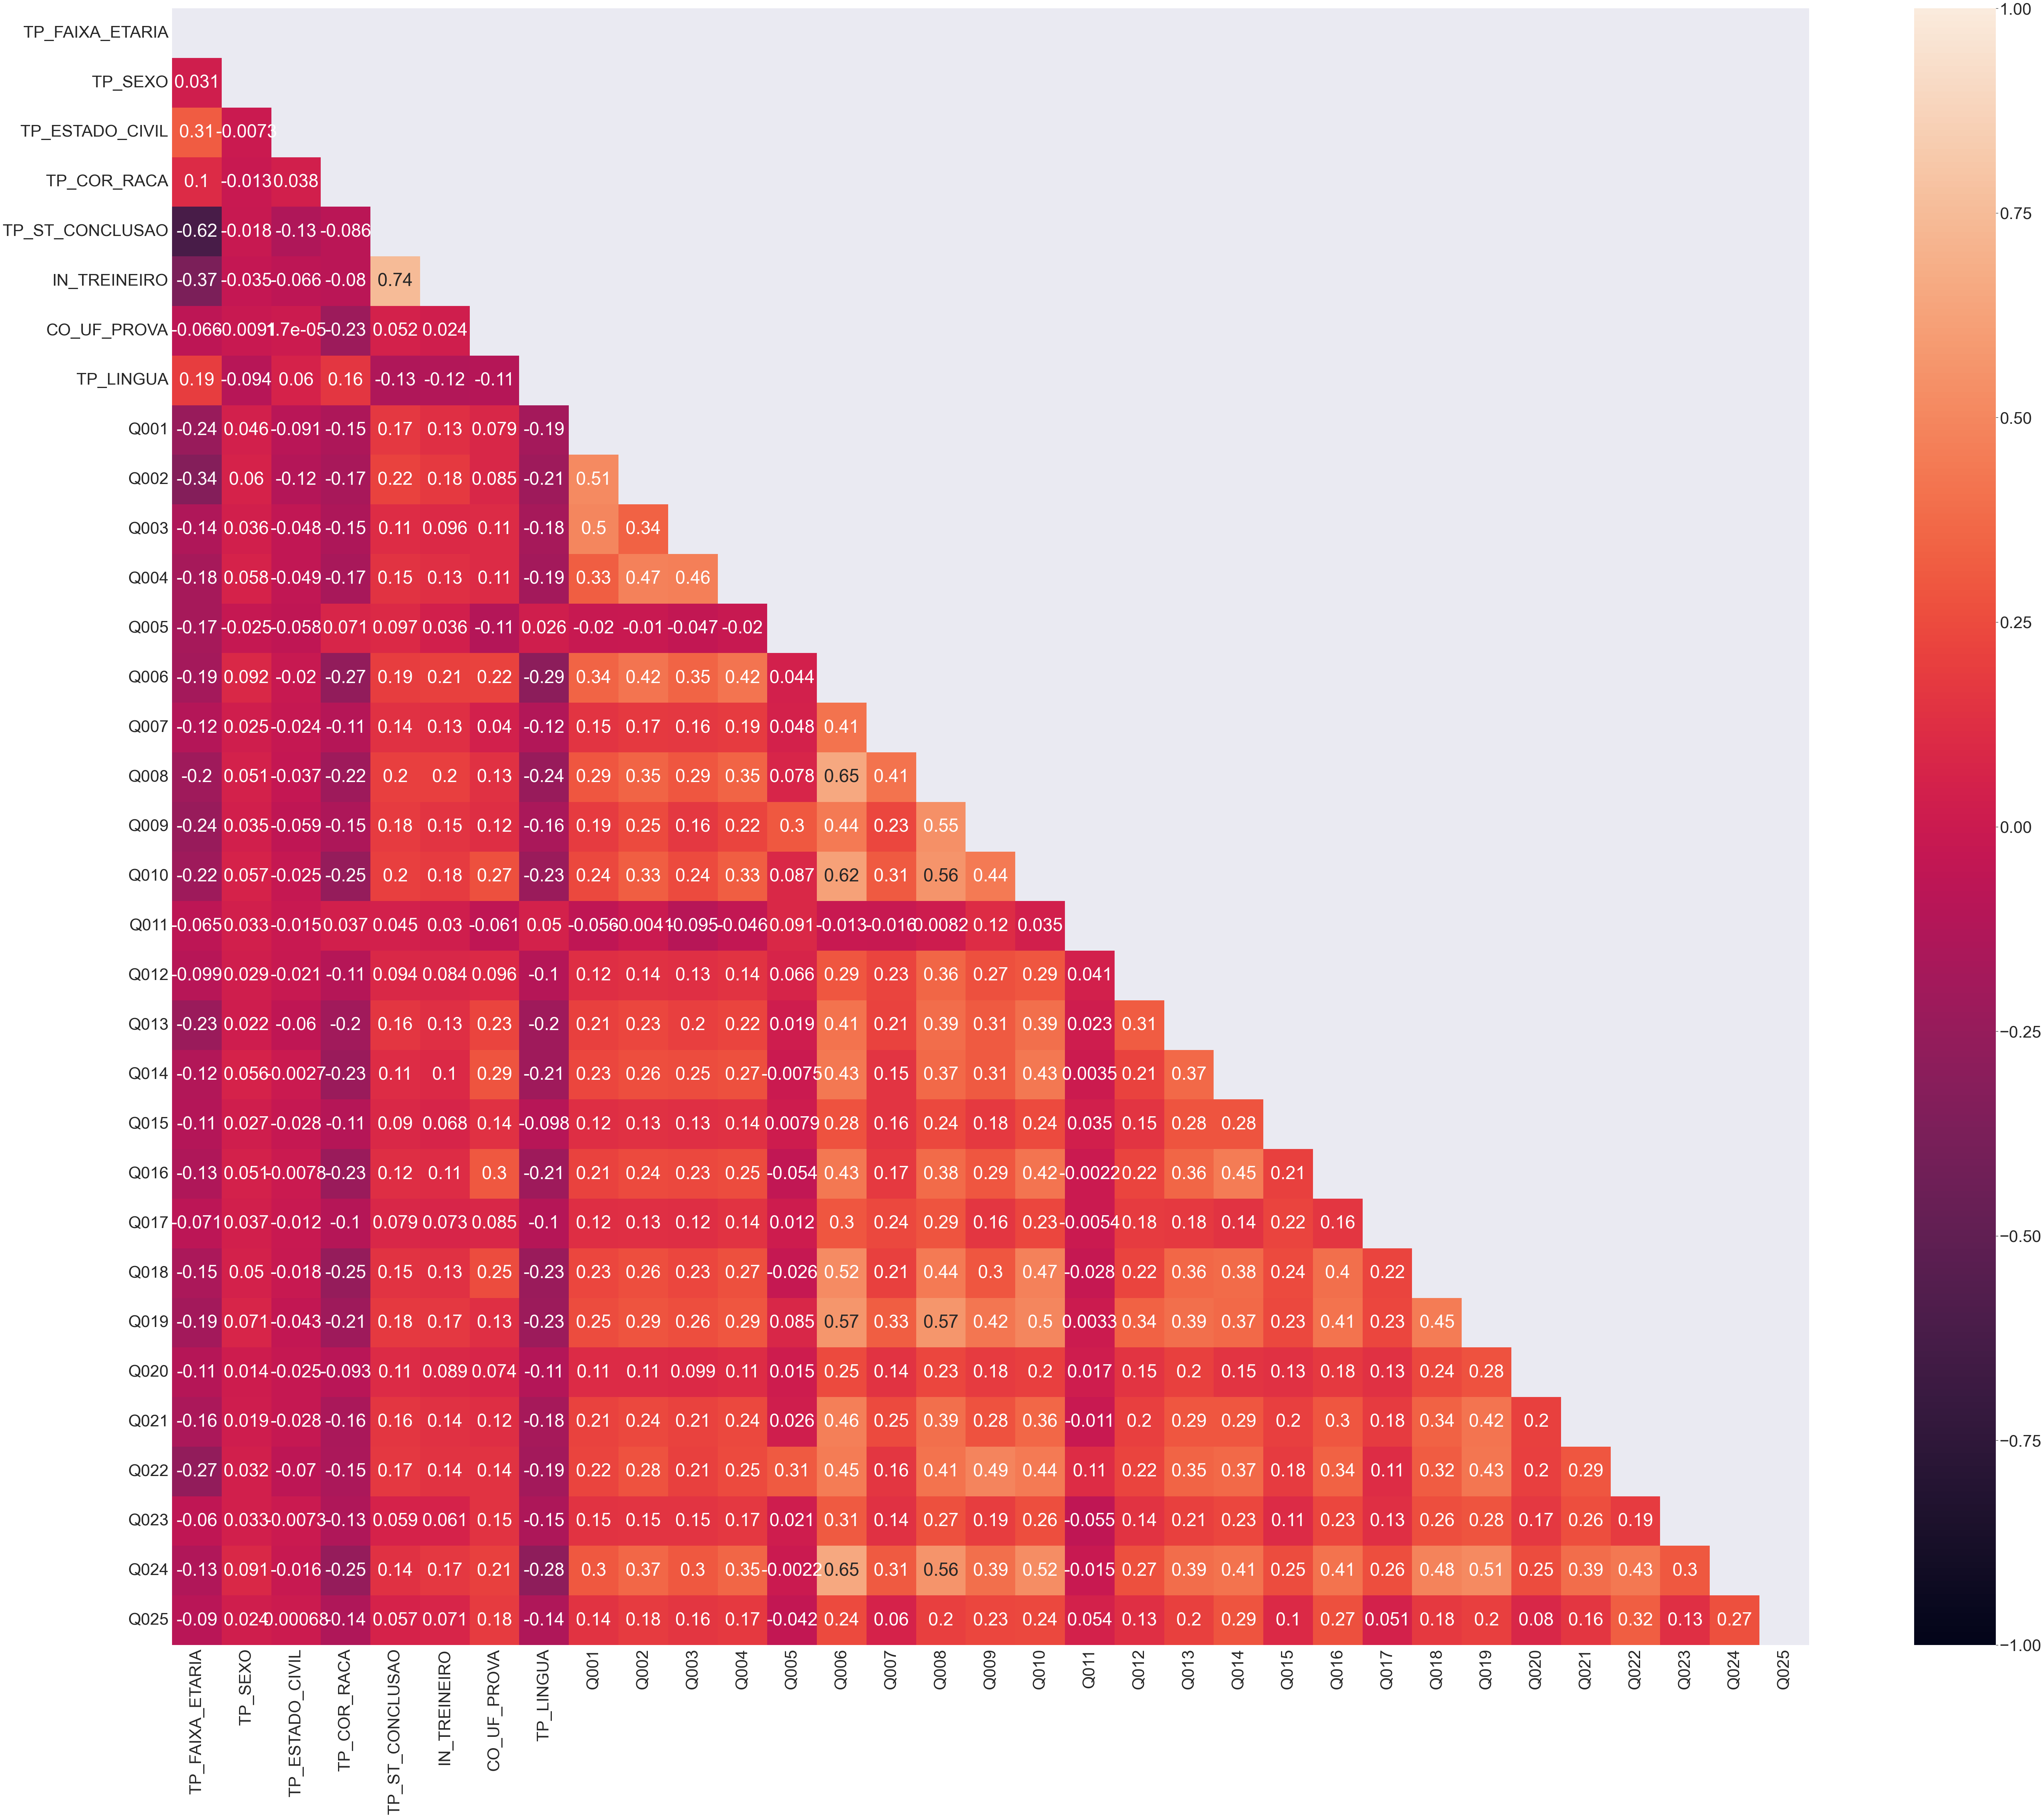

In [22]:
# Análise visual da correlação entre as varíaveis a serem utilizadas tentando identificar se há pares de variaveis
#   que apresentam forte correlação. Se for o caso, pode-se considerar manter apenas uma delas.
mask = np.triu(np.ones_like(dados2.corr(), dtype=bool))
plt.figure(figsize=(100,80))
sns.set(font_scale=4.0)
sns.heatmap(dados2.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1)
plt.show()

### Analisando o *heatmap* das correlações, não fica evidente nenhum par de variáveis com correlação forte, por isso todas serão mantidas.

### As maiores correlações observadas são entre faixa etária e se o candidato concluiu o Ens. Médio (candidatos com maior idade tem uma probabilidade maior de já terem concluído), e entre algumas questões do questionário socioeconômico: maior renda implica em maior quantidade de veículos, televisores, computadores e banheiros na residência, mas nenhuma correlação forte o suficiente a ponto de uma variável descrever plenamente a outra.

In [23]:
# Construir a varíavel alvo - a nota final do candidato
colunas_rotulo = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [40]:
# Maiores notas em cada prova
for col in colunas_rotulo:
    print(col,dados_2021[col].max())

NU_NOTA_CN 867.1
NU_NOTA_CH 846.9
NU_NOTA_LC 826.1
NU_NOTA_MT 953.1
NU_NOTA_REDACAO 1000.0


In [24]:
nota = dados_2021[colunas_rotulo].fillna(0)

In [25]:
# A nota final é a média das 5 provas
nota_final = nota.mean(axis=1)

In [30]:
nota_final

0          361.44
1          515.50
2            0.00
3          667.60
4          570.06
            ...  
3389826      0.00
3389827      0.00
3389828      0.00
3389829      0.00
3389830    625.36
Length: 3389830, dtype: float64

In [43]:
# Maior nota final obtida
sorted(nota_final)[-1]

862.68

### Analisados e tratados os dados, agora é possível passar aos testes com modelos de ML.

# Machine Learning
  
# Regressão utilizando KNN

In [44]:
## Definindo as features
X = dados2
X

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_UF_PROVA,TP_LINGUA,Q001,Q002,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,6,1,1,1,0,31,1,6,6,...,1,1,1,2,1,1,2,1,2,2
1,12,13,1,1,1,0,27,1,2,2,...,1,1,1,2,1,1,3,1,1,1
2,13,6,3,1,1,0,35,1,2,3,...,2,1,1,2,1,1,3,2,2,2
3,3,13,1,3,2,0,23,0,2,2,...,1,1,1,2,1,1,2,1,2,2
4,2,6,1,3,2,0,23,1,4,5,...,2,1,1,2,1,2,5,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389826,9,6,1,2,1,0,51,0,2,4,...,1,1,1,2,1,1,3,1,1,2
3389827,7,6,1,3,1,0,52,1,2,2,...,1,1,1,2,1,1,2,1,1,2
3389828,7,6,1,1,1,0,41,1,5,5,...,2,1,2,3,1,1,5,2,2,2
3389829,13,6,1,3,1,0,33,0,2,3,...,2,1,1,1,1,1,2,1,2,2


In [45]:
# Setar a variável alvo
y = nota_final
y

0          361.44
1          515.50
2            0.00
3          667.60
4          570.06
            ...  
3389826      0.00
3389827      0.00
3389828      0.00
3389829      0.00
3389830    625.36
Length: 3389830, dtype: float64

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
#O argumento passado ao KNeighborsRegressor indica o número de vizinhos a serem considerados 
modelo = KNeighborsRegressor(3)

#Treinar o modelo para estimar y (médiana do preço das casas) a partir das features em X (demais colunas do dataset)
modelo.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [155]:
#Predizer o valor dos 10000 primeiros registros como teste
predicao10000 = modelo.predict(X.head(10000))

In [156]:
#Cálculo do erro absoluto médio 
mean_absolute_error(y[0:10000],predicao10000)

135.65170666666668

## Resumo de resultados obtidos para testes com o KNN:
### k=3, n=500, mean_absolute_error=145.34288
### k=5, n=500, mean_absolute_error=170.155712
### k=7, n=500, mean_absolute_error=180.11338857142857
  
## O aumento no número de vizinhos piora a predição do modelo.

### k=3, n=1000, mean_absolute_error=142.53191333333334
### k=3, n=10000, mean_absolute_error=135.65170666666668


In [162]:
#O modelo é capaz de prever casos em que o candidato tirou zero na nota final?
len(np.where(predicao10000 == 0))

1

In [ ]:
dados1000 = pd.DataFrame()
dados1000['nota'] = y[0:1000]
dados1000['predicao'] = predicao1000
dados1000['erro'] = dados1000['nota']-dados1000['predicao']

In [ ]:
dados1000

In [ ]:
dados1000.sort_values(by=['erro'], ascending=True).head(50)

In [ ]:
dados1000.sort_values(by=['erro'], ascending=False).head(50)

# Regressão utilizando Árvores de Decisão (Decision Tree)

In [100]:
from sklearn.tree import DecisionTreeRegressor  

modelotree = DecisionTreeRegressor(random_state=1,max_depth=50,min_samples_leaf=3)
#modelotree = DecisionTreeRegressor(random_state=1,min_samples_leaf=15)

modelotree.fit(X,y)
#predicaotree1000000 = modelotree.predict(X.head(1000000))
predicaotree = modelotree.predict(X)

In [101]:
#mean_absolute_error(y[0:1000000],predicaotree1000000)
mean_absolute_error(y,predicaotree)

92.56709334472428

## Resumo de resultados obtidos para testes com o KNN:
  
#### n=100, max_depth=30, min_samples_leaf=1, mean_absolute_error=72.9871229326512
#### n=100, max_depth=30, min_samples_leaf=5,  mean_absolute_error=142.04738594339298
#### n=100, max_depth=50, min_samples_leaf=5,  mean_absolute_error=131.53465277777778
#### n=100, max_depth=50, min_samples_leaf=3,  mean_absolute_error=103.40081999999998
#### n=1000, max_depth=50, min_samples_leaf=3,  mean_absolute_error=100.68137607326008
#### n=10000, max_depth=50, min_samples_leaf=3,  mean_absolute_error=91.92327975217793
#### n=10000, max_depth=70, min_samples_leaf=3,  mean_absolute_error=91.56648421458775
#### n=100000, max_depth=50, min_samples_leaf=3,  mean_absolute_error=89.30733960046932
#### n=100000, max_depth=70, min_samples_leaf=3,  mean_absolute_error=89.29739602038099
#### n=1000000, max_depth=50, min_samples_leaf=3,  mean_absolute_error=90.43330674717862
#### n=1000000, max_depth=70, min_samples_leaf=3,  mean_absolute_error=90.38068324488606
#### n=tudo,       max_depth=50, min_samples_leaf=3,  mean_absolute_error=92.56709334472428


In [65]:
dadostree10000 = pd.DataFrame()
dadostree10000['nota'] = y[0:10000]
dadostree10000['predicao'] = predicaotree10000
dadostree10000['erro'] = dadostree10000['nota']-dadostree10000['predicao']

In [66]:
#Visualizando alguns resultados
dadostree10000.sample(20)

,nota,predicao,erro
9298,498.40,166.133333,332.266667
8332,509.22,410.968000,98.252000
264,0.00,75.173333,-75.173333
9523,466.78,418.433333,48.346667
1032,520.12,586.026667,-65.906667
1452,485.36,504.724000,-19.364000
9041,667.42,222.473333,444.946667
3468,0.00,117.885000,-117.885000
6569,597.82,602.420000,-4.600000
9747,663.60,649.046667,14.553333


In [103]:
#Modelo aplicado a todo o conjunto de dados
dadostree = pd.DataFrame()
dadostree['nota'] = y
dadostree['predicao'] = predicaotree
dadostree['erro'] = dadostree['nota']-dadostree['predicao']

In [104]:
dadostree.sample(20)

,nota,predicao,erro
2924614,508.96,566.716000,-57.756000
1254200,564.76,426.896000,137.864000
2701826,574.64,554.860000,19.780000
996908,592.44,587.655000,4.785000
1506510,596.36,563.368000,32.992000
1135264,0.00,378.230000,-378.230000
1656038,425.68,415.755000,9.925000
1538040,756.94,252.313333,504.626667
1145386,0.00,0.000000,0.000000
3291544,0.00,0.000000,0.000000


In [82]:
#O modelo é capaz de predizer a nota de alunos que tiraram zero (não foram fazer as provas)?
idx = dadostree10000.query('nota == 0 & predicao == 0')

In [83]:
idx 

,nota,predicao,erro
2,0.0,0.0,0.0
14,0.0,0.0,0.0
44,0.0,0.0,0.0
52,0.0,0.0,0.0
64,0.0,0.0,0.0
...,...,...,...
9892,0.0,0.0,0.0
9925,0.0,0.0,0.0
9934,0.0,0.0,0.0
9937,0.0,0.0,0.0


In [107]:
dados_2021.loc[idx.index]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
14,210054173438,2021,5,F,1,2,1,2,0,2,...,B,A,B,C,A,B,B,B,B,B
44,210051934442,2021,11,M,1,1,1,1,9,1,...,B,A,A,B,B,A,D,A,B,B
52,210051748805,2021,5,F,1,3,2,1,2,1,...,B,A,A,B,A,A,D,A,B,B
64,210051982391,2021,11,F,1,2,1,1,3,1,...,B,A,B,B,A,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,210052486243,2021,3,F,1,3,1,2,0,2,...,B,A,A,E,A,B,E,A,B,B
9925,210053973094,2021,11,F,1,3,1,1,10,1,...,A,A,A,B,A,A,B,A,B,B
9934,210051660550,2021,6,F,1,3,2,1,4,1,...,B,A,A,B,A,A,E,A,B,B
9937,210053766028,2021,6,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B


In [88]:
idx.index

Int64Index([   2,   14,   44,   52,   64,   74,   84,   87,   90,  100,
            ...
            9836, 9847, 9857, 9881, 9885, 9892, 9925, 9934, 9937, 9989],
           dtype='int64', length=782)

# Decision Tree com dois conjuntos (treino e teste)

In [214]:
from sklearn.model_selection import train_test_split

treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=2,train_size=0.8)
treino_X.shape

(2711864, 33)

In [215]:
len(val_X)

677966

In [216]:
treino_X.shape[0]+len(val_X) == dados2.shape[0]

True

In [217]:
modelotree = DecisionTreeRegressor(random_state=1,max_depth=50,min_samples_leaf=10)
modelotree.fit(treino_X, treino_y)
predicaotree2 = modelotree.predict(val_X)

In [218]:
mean_absolute_error(val_y,predicaotree2)

200.69423469008856

In [147]:
# n=tudo    max_depth=50 min_samples_leaf=3  mean_absolute_error=217.8007943753524
# n=tudo    max_depth=70 min_samples_leaf=3  mean_absolute_error=217.82702258722895
# n=tudo    max_depth=50 min_samples_leaf=1  mean_absolute_error=233.1322818361209
# n=tudo    max_depth=50 min_samples_leaf=5  mean_absolute_error=209.30070947687562
# n=tudo    max_depth=50 min_samples_leaf=10  mean_absolute_error=200.84429667233042

## Conclusão: 

### O erro médio do modelo aumenta significativamente com a divisão dos dados em conjunto de teste e treino. A predição da nota de alunos ausentes prejudica a intepretação dos resultados, pois como eles faltaram, tiraram zero. Decision Tree aparentemente é capaz de predizer alguns casos de alunos ausentes, mas como 1/3 do total de alunos faltaram a um ou aos dois dias de prova, são muitos casos, dificultando a implementação do modelo.

## Solução: 

### Construir uma nova base de dados considerando somente os alunos que compareceram.

In [197]:
colunas_usar = ['TP_FAIXA_ETARIA',
                'TP_SEXO',
                'TP_ESTADO_CIVIL',
                'TP_COR_RACA',
                'TP_ST_CONCLUSAO',
                'IN_TREINEIRO',
                'CO_UF_PROVA',
                'TP_LINGUA',
                'Q001','Q002','Q003','Q004',
                'Q005','Q006','Q007','Q008',
                'Q009','Q010','Q011','Q012',
                'Q013','Q014','Q015','Q016',
                'Q017','Q018','Q019','Q020',
                'Q021','Q022','Q023','Q024','Q025',
                'NOTA_FINAL']

# Removendo os 2 registros em que os questionário não está preenchido
dados_2021 = dados_2021[dados_2021['Q001'].notna()]

# Dicionário para converção das respostas alfanuméricas para números -> alguns algoritmos ML exigem
letras_para_numero = {'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10,
                      'K':11, 'L':12, 'M':13, 'N':14, 'O':15, 'Q':16, 'P':17}

colunas_rotulo = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [198]:
# Cria uma coluna NOTA_FINAL calculada pela média das notas nas quatro provas + redação
# Alunos que não compareceram em alguma das provas (NaN), serão tratados a seguir
dados_2021['NOTA_FINAL'] = dados_2021[colunas_rotulo].mean(axis=1)

In [201]:
# Desconsiderar alunos que faltaram ou foram eliminados de alguma das provas
dados3 = dados_2021.query('TP_PRESENCA_LC == 1 & TP_PRESENCA_CH == 1 & TP_PRESENCA_CN == 1 & TP_PRESENCA_MT == 1')


In [202]:
# Registros a serem considerados na nova base
dados3.shape

(2238106, 77)

In [203]:
# Resgistros desconsiderados - alunos ausentes
dados_2021.shape[0] - dados3.shape[0]

1151724

In [207]:
# Filtrar somente as colunas selecionadas para a análise
dados3 = dados3[colunas_usar]
dados3

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_UF_PROVA,TP_LINGUA,Q001,Q002,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_FINAL
1,12,M,1,1,1,0,27,1,B,B,...,A,A,B,A,A,C,A,A,A,515.50
3,3,M,1,3,2,0,23,0,B,B,...,A,A,B,A,A,B,A,B,B,667.60
4,2,F,1,3,2,0,23,1,D,E,...,A,A,B,A,B,E,A,B,B,570.06
8,8,F,1,3,2,0,31,0,B,B,...,A,A,B,A,A,B,A,A,B,485.60
9,4,F,1,3,2,0,29,1,D,D,...,A,B,C,B,A,C,A,A,B,466.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389793,15,F,1,1,4,0,35,1,B,B,...,A,A,B,A,A,D,A,B,B,403.58
3389807,14,M,2,3,1,0,31,1,H,C,...,A,A,B,B,A,C,B,B,B,444.14
3389814,10,M,1,1,1,0,33,0,E,E,...,A,B,B,A,B,D,B,C,B,626.30
3389815,5,F,1,3,1,0,13,1,C,H,...,A,A,B,A,A,C,A,A,B,438.88


In [208]:
# Nas colunas em que há caracteres como valor, substituir pelo valor numérico mapeado
dados3 = dados3.replace(letras_para_numero)
dados3

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_UF_PROVA,TP_LINGUA,Q001,Q002,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_FINAL
1,12,13,1,1,1,0,27,1,2,2,...,1,1,2,1,1,3,1,1,1,515.50
3,3,13,1,3,2,0,23,0,2,2,...,1,1,2,1,1,2,1,2,2,667.60
4,2,6,1,3,2,0,23,1,4,5,...,1,1,2,1,2,5,1,2,2,570.06
8,8,6,1,3,2,0,31,0,2,2,...,1,1,2,1,1,2,1,1,2,485.60
9,4,6,1,3,2,0,29,1,4,4,...,1,2,3,2,1,3,1,1,2,466.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389793,15,6,1,1,4,0,35,1,2,2,...,1,1,2,1,1,4,1,2,2,403.58
3389807,14,13,2,3,1,0,31,1,8,3,...,1,1,2,2,1,3,2,2,2,444.14
3389814,10,13,1,1,1,0,33,0,5,5,...,1,2,2,1,2,4,2,3,2,626.30
3389815,5,6,1,3,1,0,13,1,3,8,...,1,1,2,1,1,3,1,1,2,438.88


In [223]:
# Salvar a base de dados filtrada
dados3.to_csv('Dados_ENEM2021_filtrados.csv',index = False, sep=';', encoding='utf-8')

## Teste do Decision Tree na nova base - alunos que compareceram aos dois dias de prova

In [229]:
dados3.shape == (2238106, 34)

True

In [230]:
X = dados3.loc[:, dados3.columns != 'NOTA_FINAL']
y = dados3['NOTA_FINAL']

In [231]:
X

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_UF_PROVA,TP_LINGUA,Q001,Q002,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,12,13,1,1,1,0,27,1,2,2,...,1,1,1,2,1,1,3,1,1,1
3,3,13,1,3,2,0,23,0,2,2,...,1,1,1,2,1,1,2,1,2,2
4,2,6,1,3,2,0,23,1,4,5,...,2,1,1,2,1,2,5,1,2,2
8,8,6,1,3,2,0,31,0,2,2,...,2,1,1,2,1,1,2,1,1,2
9,4,6,1,3,2,0,29,1,4,4,...,2,1,2,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389793,15,6,1,1,4,0,35,1,2,2,...,1,1,1,2,1,1,4,1,2,2
3389807,14,13,2,3,1,0,31,1,8,3,...,2,1,1,2,2,1,3,2,2,2
3389814,10,13,1,1,1,0,33,0,5,5,...,1,1,2,2,1,2,4,2,3,2
3389815,5,6,1,3,1,0,13,1,3,8,...,1,1,1,2,1,1,3,1,1,2


In [232]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_absolute_error

modelotree = DecisionTreeRegressor(random_state=1,max_depth=50,min_samples_leaf=3)
#modelotree = DecisionTreeRegressor(random_state=1,min_samples_leaf=15)

modelotree.fit(X,y)
#predicaotree1000000 = modelotree.predict(X.head(1000000))
predicaotree = modelotree.predict(X)

In [233]:
#mean_absolute_error(y[0:1000000],predicaotree1000000)
mean_absolute_error(y,predicaotree)

32.274488545332865

## O erro absoluto médio caiu de ~90 para ~30.

  
## Testar com dois conjuntos (teste e treino) -> próximo notebook.